---

#  Using kwarg `fill_between` with mplfinance

---

---

### PLEASE NOTE:  It is recommended that you read the following tutorials before continuing:
- [Plot Customizations](https://github.com/matplotlib/mplfinance/blob/master/examples/plot_customizations.ipynb)
- [Adding Your Own Technical Studies to Plots](https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb)
- [Panels](https://github.com/matplotlib/mplfinance/blob/master/examples/panels.ipynb)

---

### `fill_between`
- **`fill_between`** is used to fill areas of color between specified values on your plot.  This is typically done to highlight or emphasize portions of the plot, or to make an obvious distinction between different portions of the plot.  For example, you may want to highlight the area between Trading Bands in a Bollinger plot.  Or color a positive moving average area differently from negative moving average area.

### **`fill_between`** is available in *both* **`mpf.plot()`** and **`mpf.make_addplot()`**.

---

### Usage:
#### `fill_between` may be set to a single y-value, a series of y-values, a dict, or a series of dicts, for example:
- **`fill_between=y1`** 
  - `y1` is a single y value, or a series of y values.  If a series, then the series *must be the same length as your ohlc data frame*.  
  - The fill color is placed between the y value(s) and y=0.
  <br>&nbsp;<br>
- **`fill_between=dict(y1=value(s),y2=0,where=None,kwargs)`**
  - `y2` defaults to 0, and is a single value, or series of values the same length as your data frame.
  - `where` is a boolean series the same length as your data frame.  Fill color appears *only* where the boolean series is `True`.
  - `kwargs` are any additional kwargs accepted by matplotlib [**`Axes.fill_between()`**](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.fill_between.html).
  <br>&nbsp;<br>
- **`fill_between=[d1,d2,...]`**
  - where d1, d2, etc are each fill_between dicts as described above.
  

#### Note that 
kwarg `fill_between=` is similar to matplotlib method [`Axes.fill_between()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.fill_between.html)<br> **except** you **do** ***NOT*** specify the x-axis (**rather the x-axis is always assumed to be the datetime index of your dataframe**)

---

### Examples:
---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

### Read in daily data for the S&P 500 from November of 2019 

In [3]:
daily = pd.read_csv('data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878
2019-11-05,3080.80,3083.95,3072.15,3074.62,585634570


In [4]:
import mplfinance as mpf
mpf.__version__

'0.12.10b0'



A single y-value or series **assumes** we fill between ZERO and that single y-value or series.

Therefore, scale down the data, close to zero, so that we can demonstrate specifying
a single y-value, or single y-series for fill_between:




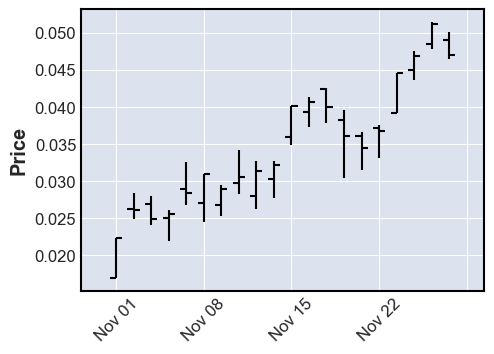

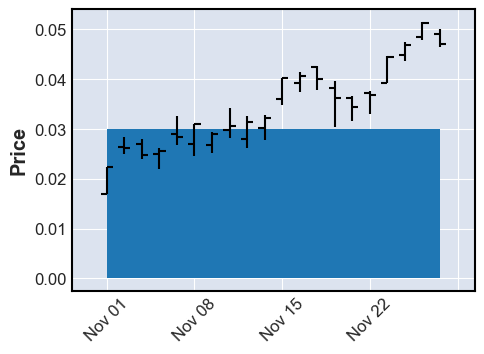

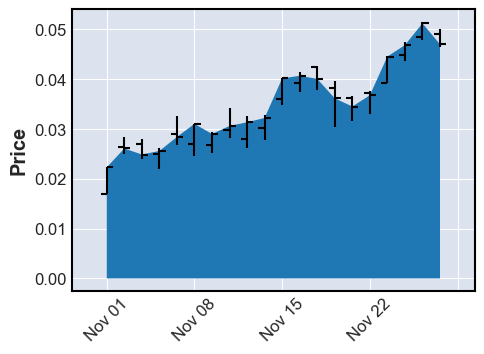

In [5]:
print('''

A single y-value or series **assumes** we fill between ZERO and that single y-value or series.

Therefore, scale down the data, close to zero, so that we can demonstrate specifying
a single y-value, or single y-series for fill_between:

''')
scaled_down_data = (daily/3000)-1.0

mpf.plot(scaled_down_data,figscale=0.7)
mpf.plot(scaled_down_data,figscale=0.7,fill_between=0.03)
mpf.plot(scaled_down_data,figscale=0.7,fill_between=scaled_down_data['Close'].values)



Use a dict to specify two y values, or two series, (y1 and y2) for `fill_between`:




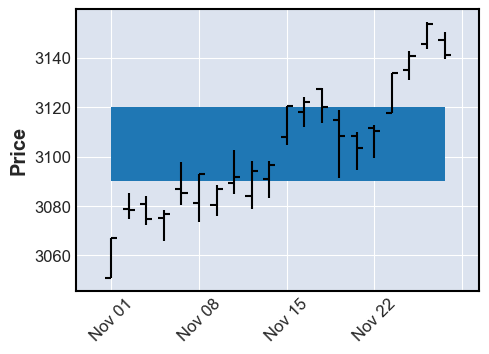

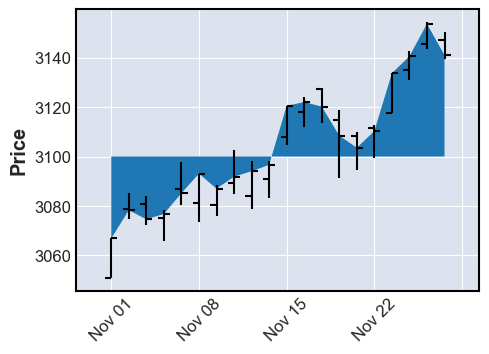

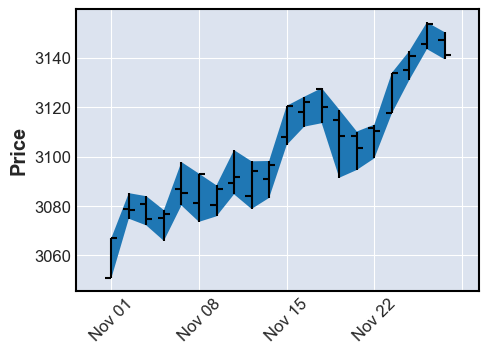

In [6]:
print('''

Use a dict to specify two y values, or two series, (y1 and y2) for `fill_between`:

''')

mpf.plot(daily,figscale=0.7,fill_between=dict(y1=3090,y2=3120))
mpf.plot(daily,figscale=0.7,fill_between=dict(y1=3100,y2=daily['Close'].values))
mpf.plot(daily,figscale=0.7,fill_between=dict(y1=daily['Low'].values,y2=daily['High'].values))



Use a dict to specify other attributes (kwargs) for `fill_between`:

To demonstrate use of the `where` kwarg to display a holding period,
we convert the datetime index into a dataframe, and use that to generate a boolean array:

`where_values = pd.notnull(dates_df[ (dates_df>=buy_date) & (dates_df <= sell_date) ])['Date'].values`




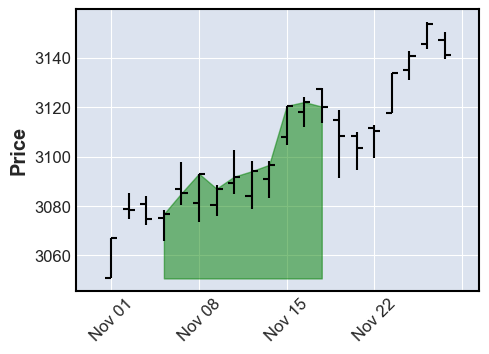

In [7]:
print('''

Use a dict to specify other attributes (kwargs) for `fill_between`:

To demonstrate use of the `where` kwarg to display a holding period,
we convert the datetime index into a dataframe, and use that to generate a boolean array:

`where_values = pd.notnull(dates_df[ (dates_df>=buy_date) & (dates_df <= sell_date) ])['Date'].values`

''')

dates_df     = pd.DataFrame(daily.index)
buy_date     = pd.Timestamp('2019-11-06')
sell_date    = pd.Timestamp('2019-11-19')

where_values = pd.notnull(dates_df[ (dates_df>=buy_date) & (dates_df <= sell_date) ])['Date'].values

y1values = daily['Close'].values
y2value  = daily['Low'].min()

mpf.plot(daily,figscale=0.7,
         fill_between=dict(y1=y1values,y2=y2value,where=where_values,alpha=0.5,color='g')
        )



Use `panel=` in the `fill_between` dict to place the fill_between on a panel other than panel 0:

In this example, we `fill_between` on the volume panel, 
filling between the volume and the average volume.




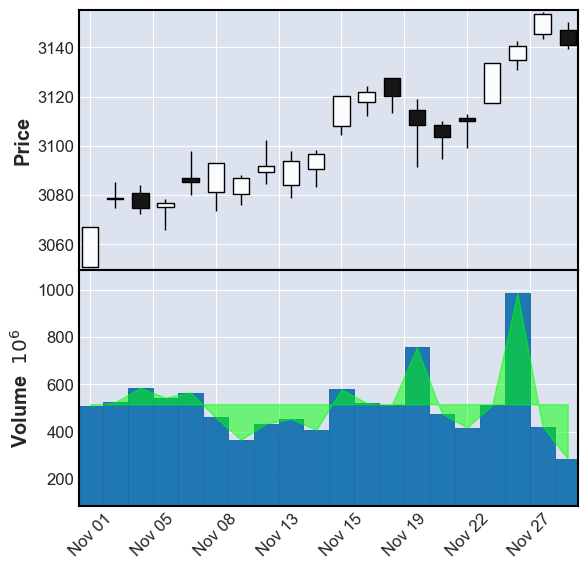

In [8]:
print('''

Use `panel=` in the `fill_between` dict to place the fill_between on a panel other than panel 0:

In this example, we `fill_between` on the volume panel, 
filling between the volume and the average volume.

''')

mpf.plot(daily,volume=True,panel_ratios=(1.1,1),
         type='candle',tight_layout=True,figratio=(1,1),
         fill_between=dict(y1=daily['Volume'].values,
                           y2=daily['Volume'].mean(),
                           panel=1,alpha=0.5,color='lime'))



There are two ways to do multiple `fill_betweens`:
(1) Specify a list of `fill_between` dicts.
(2) Specify a fill_between (or list of fill_betweens) for each `mpf.make_addplot()`

Here, for example, we specify a `fill_between=` a list of fill between dicts:




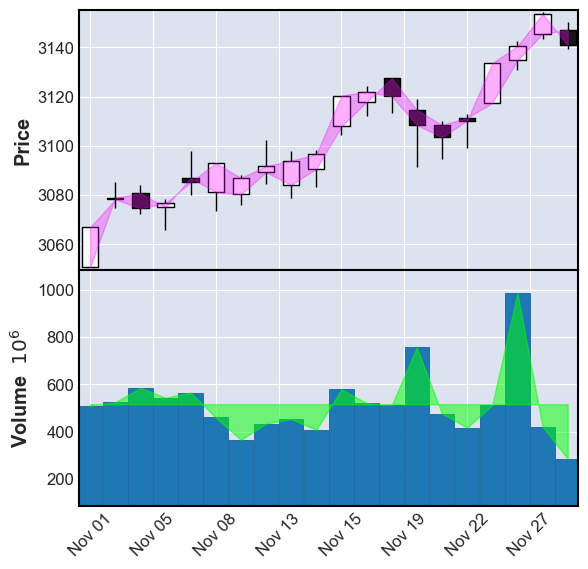

In [9]:
print('''

There are two ways to do multiple `fill_betweens`:
(1) Specify a list of `fill_between` dicts.
(2) Specify a fill_between (or list of fill_betweens) for each `mpf.make_addplot()`

Here, for example, we specify a `fill_between=` a list of fill between dicts:

''')

fb1 = dict(y1=daily['Open'].values  , y2=daily['Close'].values , panel=0, alpha=0.3, color='magenta')
fb2 = dict(y1=daily['Volume'].values, y2=daily['Volume'].mean(), panel=1, alpha=0.5, color='lime')

mpf.plot(daily,volume=True,panel_ratios=(1.1,1),
         type='candle',tight_layout=True,figratio=(1,1),
         fill_between=[fb1,fb2])



We can accomplish the same thing by specifying one fill_between in `mpf.plot()`
and the other in `mpf.make_addplot()`.   This is useful if we are already using
`make_addplot()` to plot some additional data.  

NOTE: Since make_addplot() accepts a panel argument, one should NOT specify
      panel in the fill_between dict used by make_addplot.




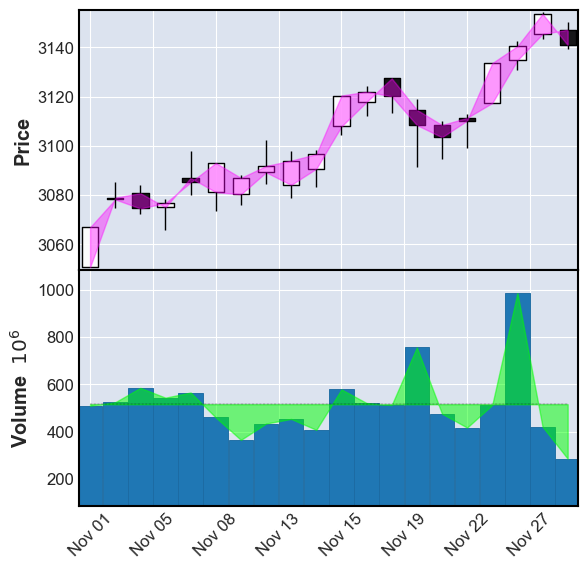

In [10]:
print('''

We can accomplish the same thing by specifying one fill_between in `mpf.plot()`
and the other in `mpf.make_addplot()`.   This is useful if we are already using
`make_addplot()` to plot some additional data.  

NOTE: Since make_addplot() accepts a panel argument, one should NOT specify
      panel in the fill_between dict used by make_addplot.

''')

fb1 = dict(y1=daily['Open'].values  , y2=daily['Close'].values , alpha=0.4, color='magenta')
fb2 = dict(y1=daily['Volume'].values, y2=daily['Volume'].mean(), alpha=0.5, color='lime')

avol = [daily['Volume'].mean()]*len(daily)

ap = mpf.make_addplot(avol,panel=1,fill_between=fb2,color='k',linestyle='-.',width=0.25)

mpf.plot(daily,volume=True,panel_ratios=(1.1,1),
         type='candle',tight_layout=True,figratio=(1,1),
         fill_between=fb1,addplot=ap)



We can specify effectively a "multi-color" fill_between, by breaking it into
two separate fill_betweens, with two separate colors, each with a "where" clause to
indicate where the fill_between color should and should not appear along the datetime axis.

This is useful, for example, if we want to highlight where a given value is 
above or below the average value.

Notice that when using multiple where clauses like this, it is helpful
to set `interpolate=True` in the `fill_between` dict, so that the space 
between True values and False values also gets filled.




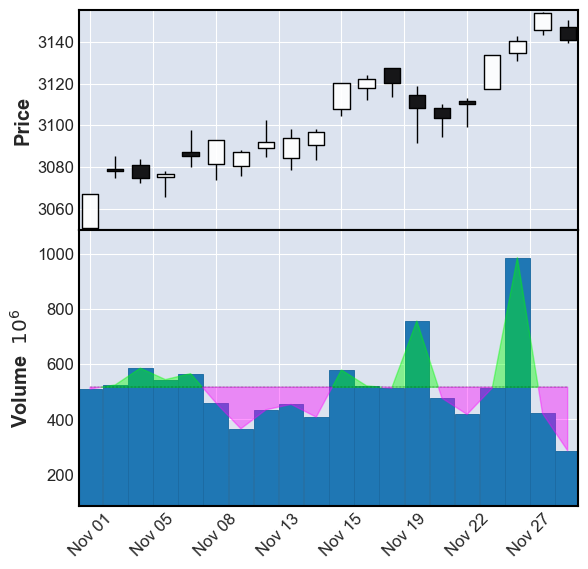

In [11]:
print('''

We can specify effectively a "multi-color" fill_between, by breaking it into
two separate fill_betweens, with two separate colors, each with a "where" clause to
indicate where the fill_between color should and should not appear along the datetime axis.

This is useful, for example, if we want to highlight where a given value is 
above or below the average value.

Notice that when using multiple where clauses like this, it is helpful
to set `interpolate=True` in the `fill_between` dict, so that the space 
between True values and False values also gets filled.

''')

fb_above = dict(y1=daily['Volume'].values, 
                y2=daily['Volume'].mean(), 
                alpha=0.4, color='lime', 
                interpolate=True,
                where=(daily['Volume'] > daily['Volume'].mean()).values)

fb_below = fb_above.copy()
fb_below['color'] = 'magenta'
fb_below['where'] = (daily['Volume'] < daily['Volume'].mean()).values


avol = [daily['Volume'].mean()]*len(daily)
ap = mpf.make_addplot(avol,panel=1,fill_between=[fb_above,fb_below],color='k',linestyle='-.',width=0.25)

mpf.plot(daily,volume=True,panel_ratios=(0.8,1),
         type='candle',tight_layout=True,figratio=(1,1),addplot=ap)



Here, as an additional example, we create "multi-color" fill_between for both panels:




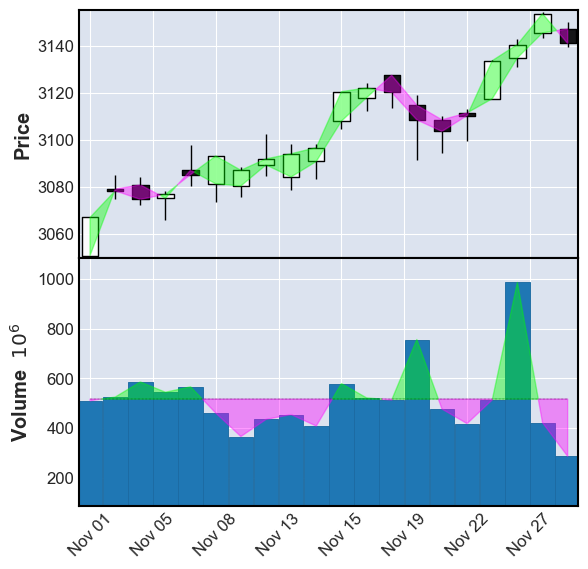

In [12]:
print('''

Here, as an additional example, we create "multi-color" fill_between for both panels:

''')

fbvolume_above = dict(y1=daily['Volume'].values, 
                y2=daily['Volume'].mean(), 
                alpha=0.4, color='lime', 
                interpolate=True,
                where=(daily['Volume'] > daily['Volume'].mean()).values)

fbvolume_below = fbvolume_above.copy()
fbvolume_below['color'] = 'magenta'
fbvolume_below['where'] = (daily['Volume'] < daily['Volume'].mean()).values

avol = [daily['Volume'].mean()]*len(daily)
ap = mpf.make_addplot(avol,panel=1,fill_between=[fbvolume_above,fbvolume_below],color='k',linestyle='-.',width=0.25)

fbclose_above = dict(y1=daily['Open'].values  , y2=daily['Close'].values , alpha=0.4, 
                     interpolate=True,
                     color='lime',
                     where=(daily['Close']>daily['Open']).values
                    )


fbclose_below = fbclose_above.copy()
fbclose_below['color'] = 'magenta'
fbclose_below['where'] = (daily['Close']<daily['Open']).values


mpf.plot(daily,volume=True,panel_ratios=(1,1),
         type='candle',tight_layout=True,figratio=(1,1),
         fill_between=[fbclose_above,fbclose_below],
         addplot=ap)



Finally, as a more pratical example, we use `fill_between` to color a MACD plot:




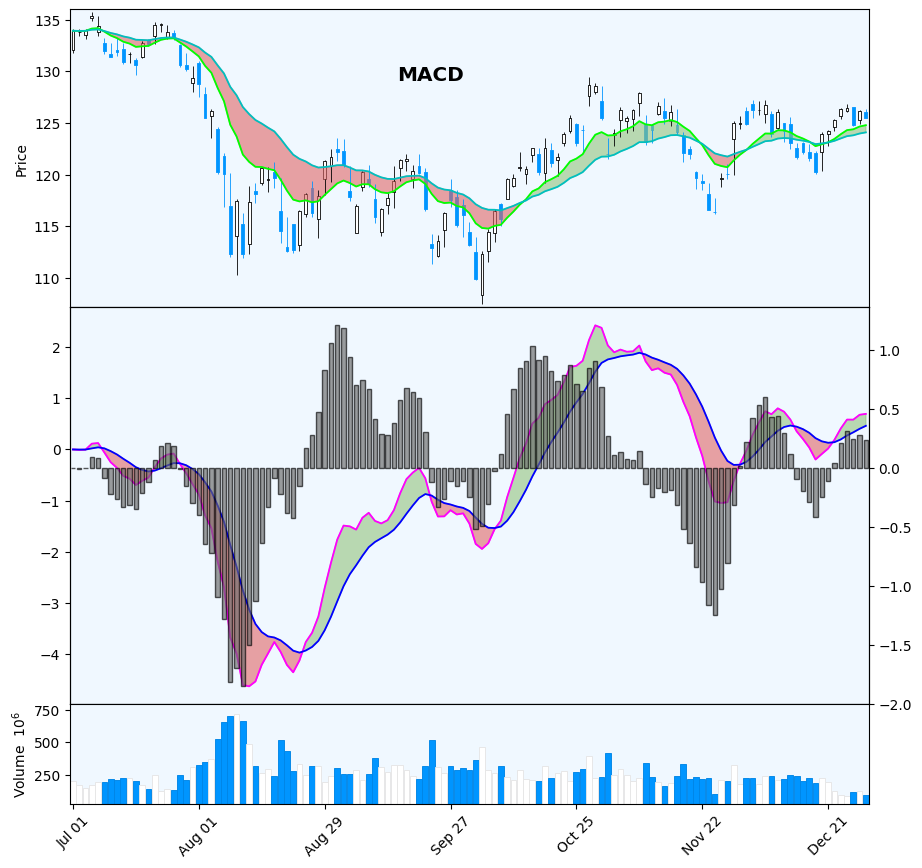

In [13]:
print('''

Finally, as a more pratical example, we use `fill_between` to color a MACD plot:

''')

df = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True).loc['2011-07-01':'2011-12-30',:]

# =======
#  MACD:

exp12     = df['Close'].ewm(span=12, adjust=False).mean()
exp26     = df['Close'].ewm(span=26, adjust=False).mean()
macd      = exp12 - exp26
signal    = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

fb_12up = dict(y1=exp12.values,y2=exp26.values,where=exp12>exp26,color="#93c47d",alpha=0.6,interpolate=True)
fb_12dn = dict(y1=exp12.values,y2=exp26.values,where=exp12<exp26,color="#e06666",alpha=0.6,interpolate=True)
fb_exp12 = [fb_12up,fb_12dn]

fb_macd_up = dict(y1=macd.values,y2=signal.values,where=signal<macd,color="#93c47d",alpha=0.6,interpolate=True)
fb_macd_dn = dict(y1=macd.values,y2=signal.values,where=signal>macd,color="#e06666",alpha=0.6,interpolate=True)
fb_macd_up['panel'] = 1
fb_macd_dn['panel'] = 1

fb_macd = [fb_macd_up,fb_macd_dn]

apds = [mpf.make_addplot(exp12,color='lime'),
        mpf.make_addplot(exp26,color='c'),
        mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,
                         color='dimgray',alpha=0.65,secondary_y=True),
        mpf.make_addplot(macd,panel=1,color='fuchsia',secondary_y=False),
        mpf.make_addplot(signal,panel=1,color='b',secondary_y=False)#,fill_between=fb_macd),
       ]

s = mpf.make_mpf_style(base_mpf_style='blueskies',facecolor='aliceblue')#,rc={'figure.facecolor':'lightcyan'})

mpf.plot(df,type='candle',addplot=apds,figscale=1.6,figratio=(1,1),title='\n\nMACD',
         style=s,volume=True,volume_panel=2,panel_ratios=(3,4,1),tight_layout=True,
         fill_between=fb_macd+fb_exp12)



